<a href="https://colab.research.google.com/github/Ajb2307/DSPS_ABaldelli/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

from google.colab import drive
import json
import os
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
# this gets you to your drive folder
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
# this makes sure the file is there: this cell should return "kaggle.json"
%ls kaggle.json

kaggle.json


In [ ]:
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

In [ ]:
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

In [ ]:
# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.
Path to dataset files: /kaggle/input/world-happiness-report-2024-yearly-updated


In [ ]:

path = "/kaggle/input/world-happiness-report-2024-yearly-updated"


csv_path = os.path.join(path, "World-happiness-report-2024.csv")
report = pd.read_csv(csv_path)

# cleaning nans
report = report[report.isna().sum(axis =1) == 0]
report.isna().sum().sum() #boolean for if zero so = 0 if no nans


np.int64(0)

In [ ]:
report.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [ ]:

report_minmax = report.copy()
report_standard = report.copy()


num_cols = report.columns[2:]


report_num = report.copy()
for c in num_cols:
    report_num[c] = pd.to_numeric(report_num[c], errors='coerce')


for c in num_cols:
    s = report_num[c]

    vmin = np.nanmin(s.values)
    vmax = np.nanmax(s.values)
    diff  = vmax - vmin
    if np.isfinite(diff) and diff > 0:
        report_minmax[c] = (s - vmin) / diff
    else:
        report_minmax[c] = 0.0

    mu    = np.nanmean(s.values)
    sigma = np.nanstd(s.values)
    if np.isfinite(sigma) and sigma > 0:
        report_standard[c] = (s - mu) / sigma
    else:
        report_standard[c] = 0.0



In [ ]:
report_minmax.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1.000000,1.000000,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,Denmark,Western Europe,0.973754,0.975166,0.972167,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,Iceland,Western Europe,0.964120,0.967384,0.961000,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,Sweden,Western Europe,0.934053,0.934934,0.933333,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,Israel,Middle East and North Africa,0.933555,0.932119,0.935000,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061


In [ ]:
report_standard.head()


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1.877713,1.869989,1.884208,1.098248,1.317793,1.059525,1.472287,-0.058370,3.115426,0.945009
1,Denmark,Western Europe,1.743476,1.740783,1.744314,1.249342,1.161225,1.083865,1.249941,0.788873,3.131326,0.569683
2,Iceland,Western Europe,1.694199,1.700298,1.688189,1.185599,1.453284,1.199485,1.225236,1.526794,0.221634,0.885255
3,Sweden,Western Europe,1.540421,1.531470,1.549133,1.178516,1.104018,1.235996,1.342585,1.021182,2.940526,0.153278
4,Israel,Middle East and North Africa,1.537872,1.516826,1.557510,1.001453,1.140149,1.333360,0.125863,0.091947,0.309084,1.348343


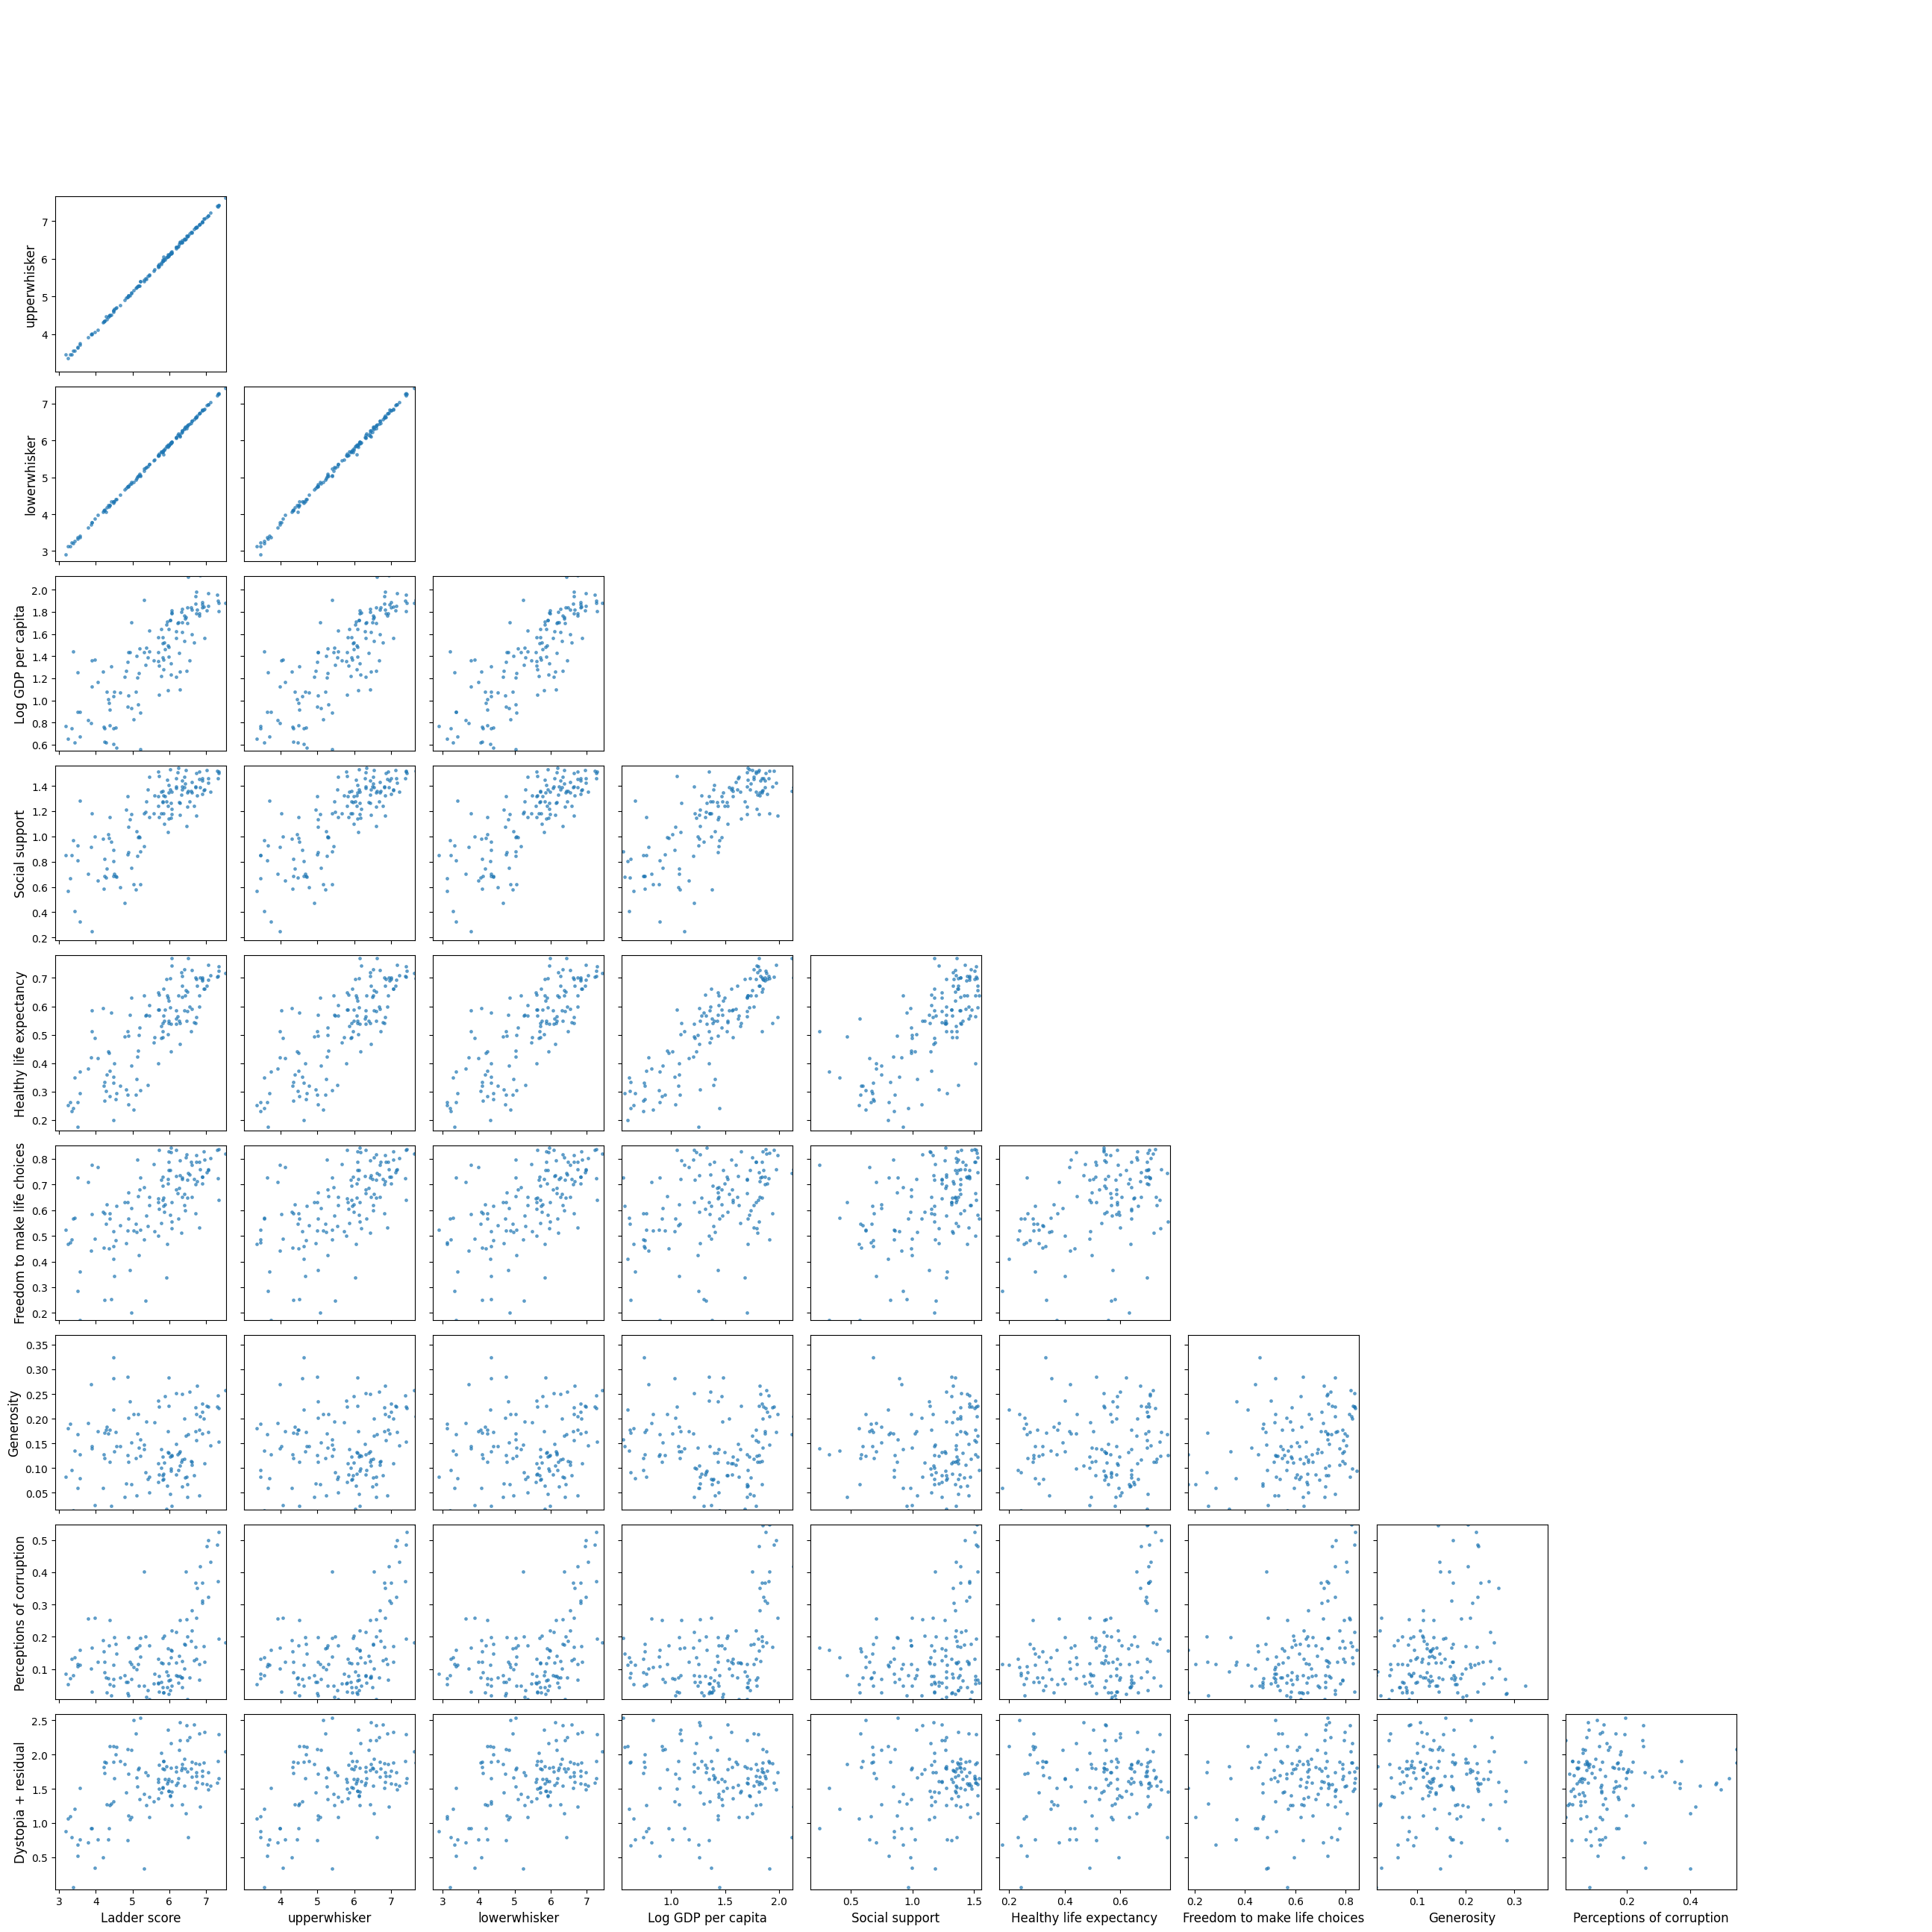

In [ ]:
df_use = report


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=12)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=12)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Fig 1**: This is a scatter plot of all numerical columns in the given World Happniess Dataset. These are the Ladder Score (happiness score),upper whisker (the upper bound of the happiness score), lower whisker (the lower bound of the happiness score), the log of the GDP per capita, social support, healthy life expenctancy, freedom to make life choices, generosity, perceptions of corruption, and dystopia + residual a "score is a combination of the Dystopia score and the unexplained residual for each country". With these 11 columns we are given 45 unique combinations.

We see that there is an almost perfect 1:1 correlation of upperwhisker, lowerwhisker, and ladder score in the top left three plots, because the upper and lower bounds are directly related to the happiness scores and one another. Similarly, the plots of upper and lower whisker and happiness score in relation to other features are nearly identical (the three left most columns). **More** interestly, the columns that are most highly correlated with the ladder score are Log of GDP per capita, social support, healthy life expectancy, indicating their affect on the overall happiness score. Another interesting correlation is the perception of corruption is not very correlated with any of the columns (appearing mostly random) until the a peak in perception of corruption > 0.3, when a positive correlation occurs in most plots.

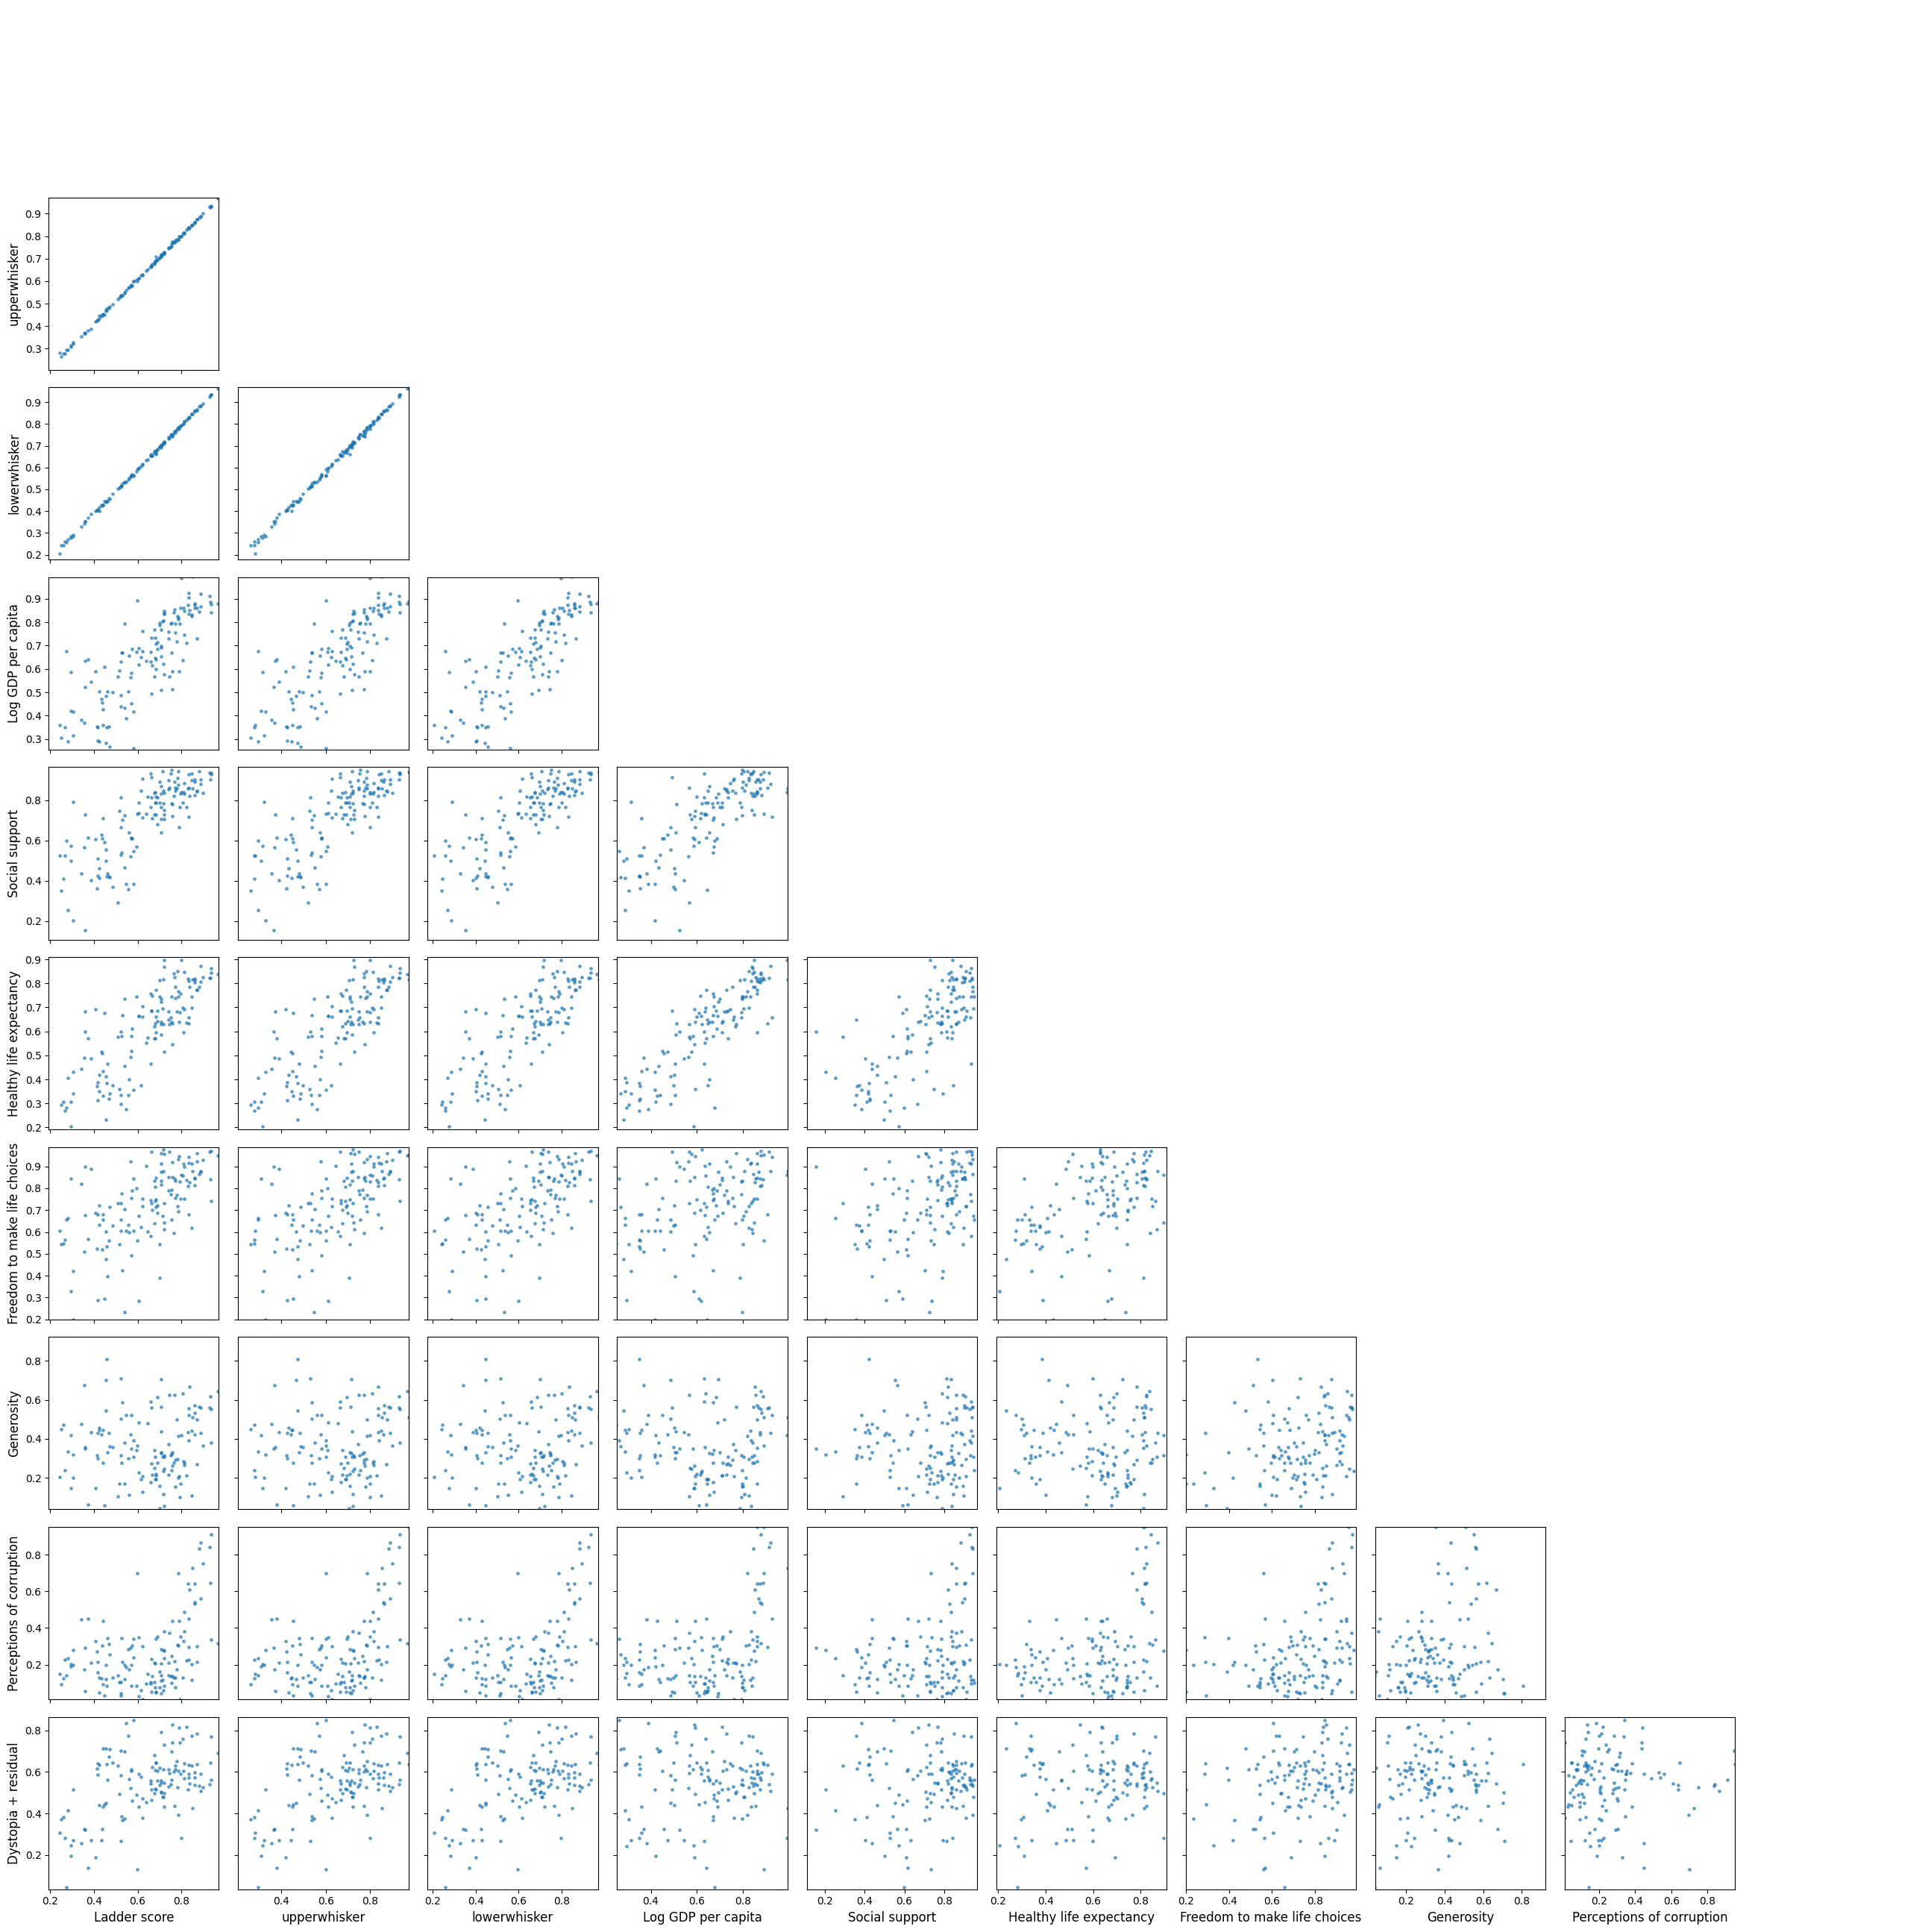

In [ ]:
df_use = report_minmax


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=12)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=12)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Fig 2**: Fig 2. is identical to fig. 1, but now the each column has recieved minmax normalized. This means that all the values are now constrained to exist between [0,1]. This is a linear transformation, so that the shape of the distributions has been preserved, but the values have be adjusted so that none of the columns dominate the clustering function due to the scale of the column. This method allows the outliers to potentially compress the center of the distribution, but keeps outliers from appearing to large numerically.

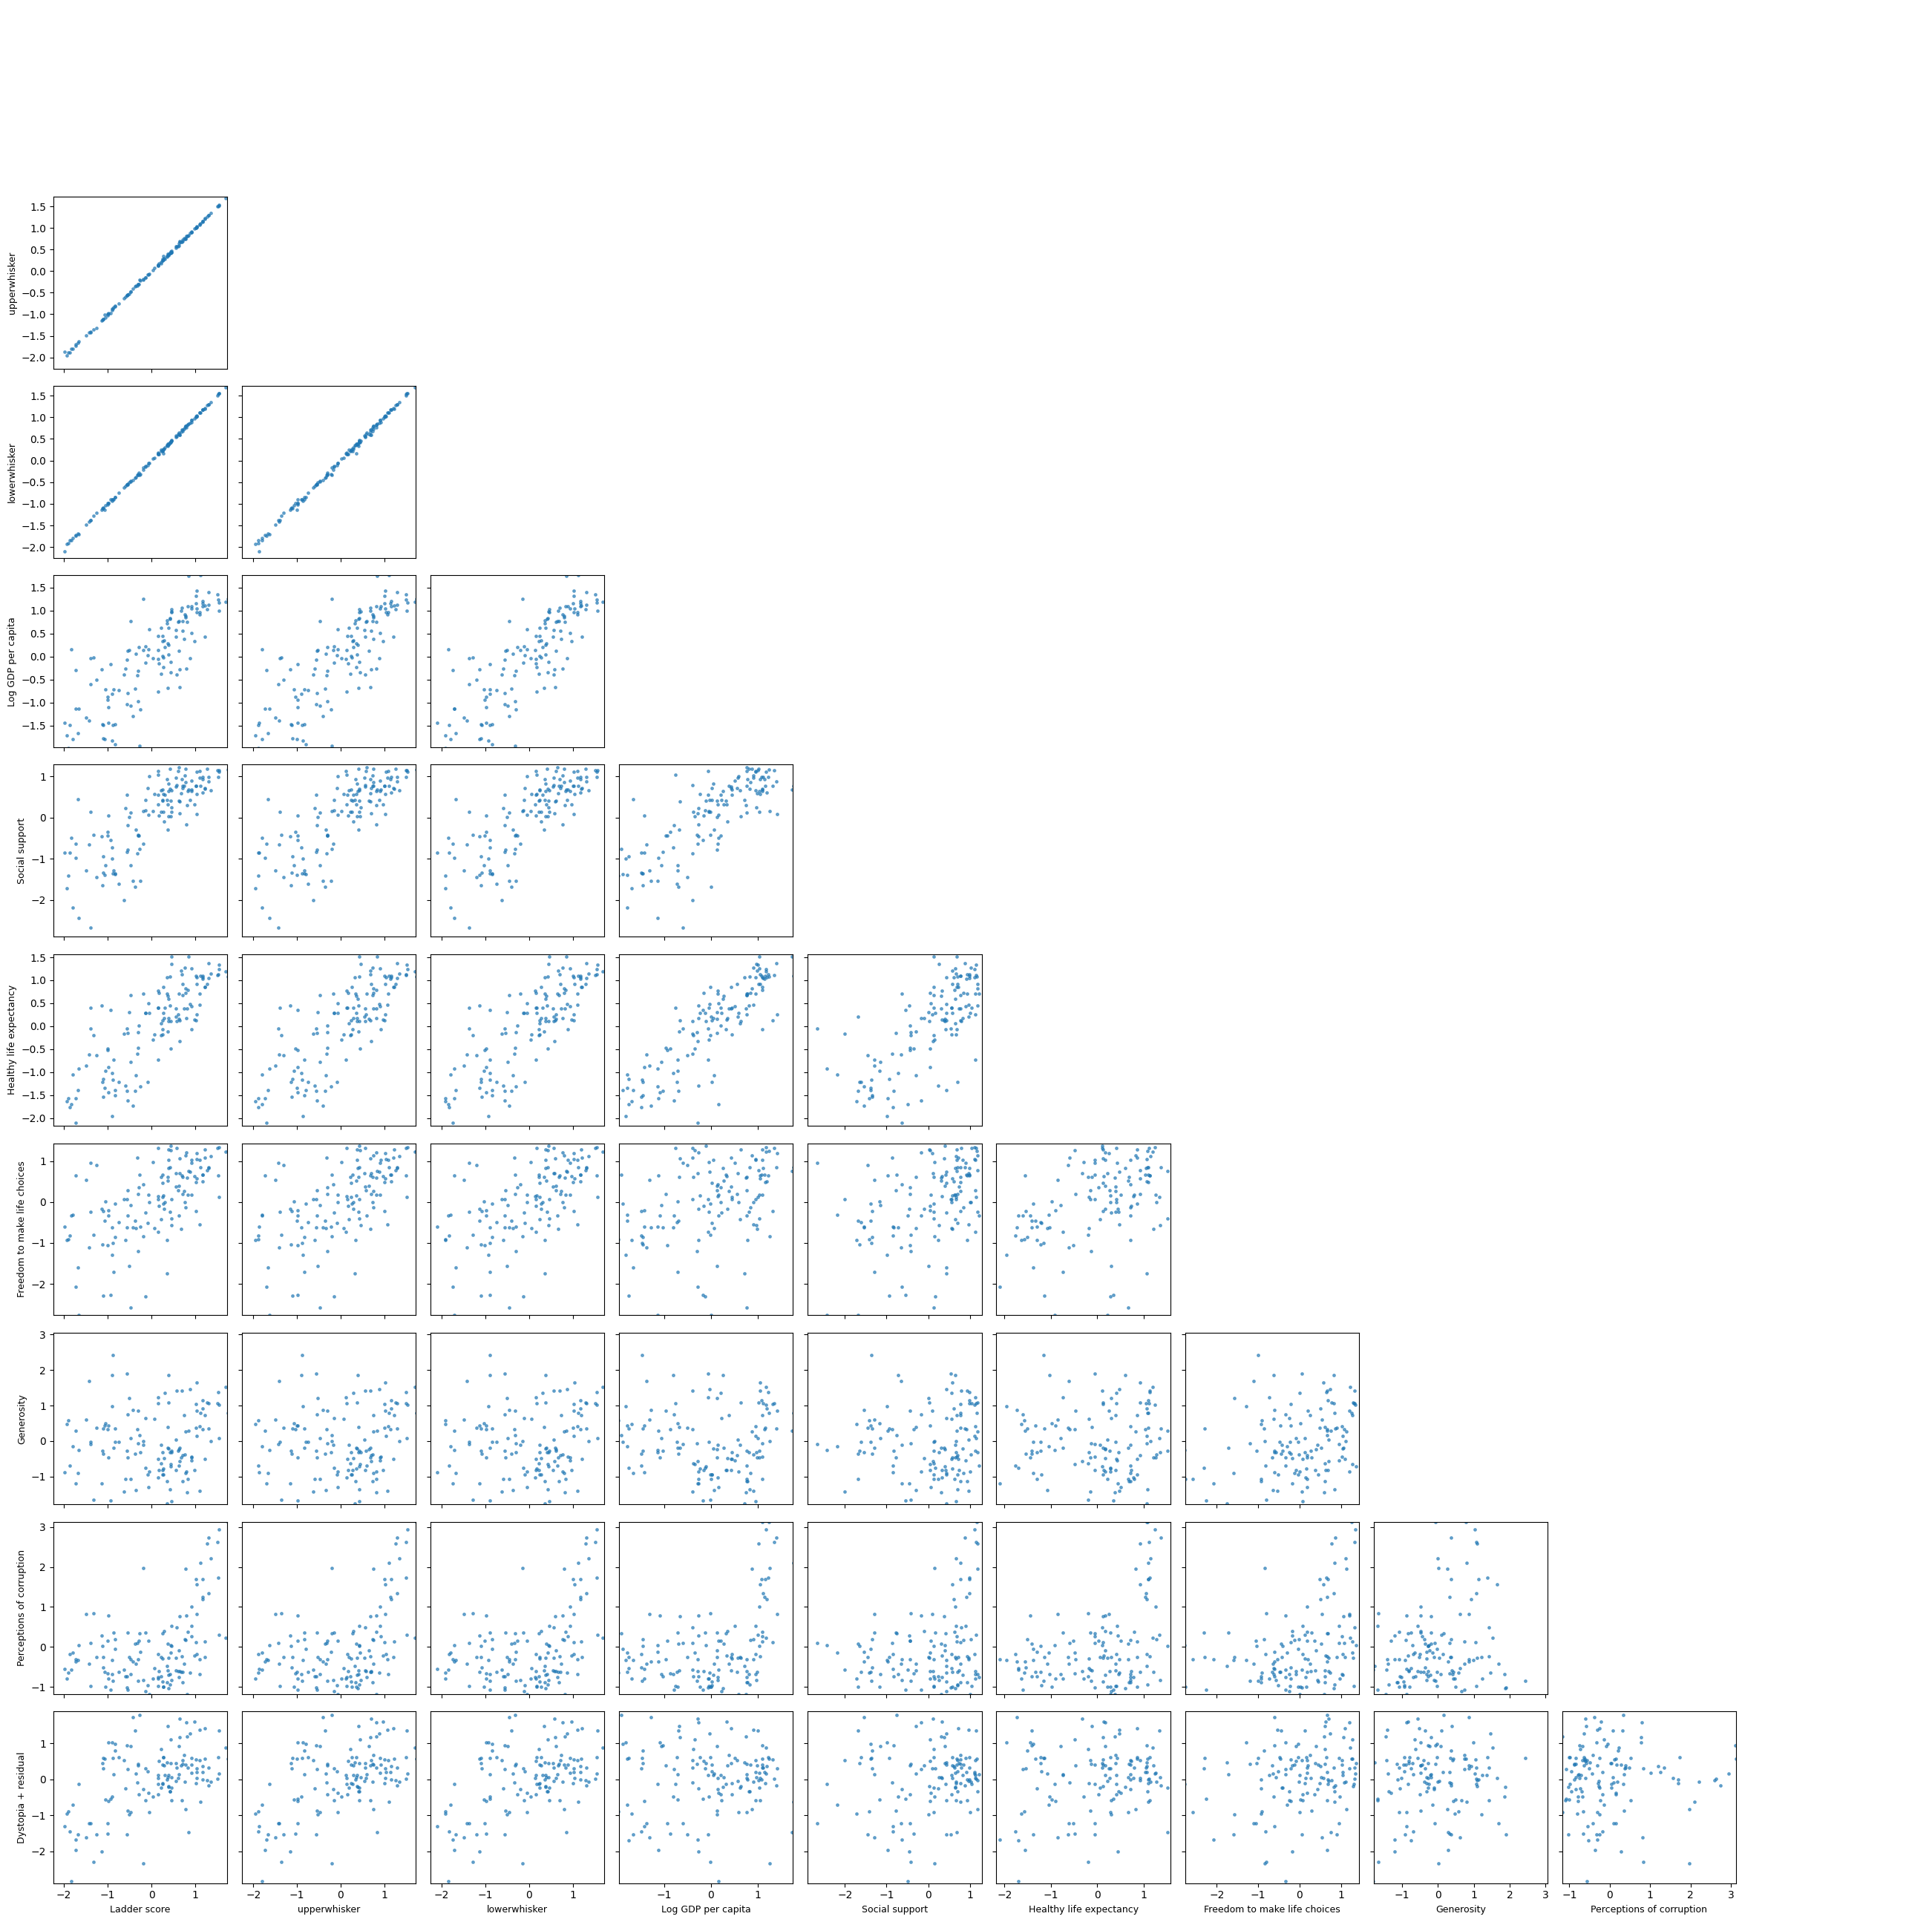

In [ ]:
df_use = report_standard


cols = df_use.columns[2:]


df_num = df_use.copy()
for c in cols:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')


valid_cols = []
for c in cols:
    v = df_num[c].to_numpy()
    m = np.isfinite(v)
    if m.sum() >= 2 and np.nanstd(v[m]) > 0:
        valid_cols.append(c)

k = len(valid_cols)


fig, axes = plt.subplots(k, k, figsize=(max(6, 2.6*k), max(6, 2.6*k)))

for i in range(k):
    for j in range(k):
        ax = axes[i, j]
        if i == j or i < j:

            ax.axis("off")
            continue

        x = df_num[valid_cols[j]].to_numpy()
        y = df_num[valid_cols[i]].to_numpy()
        m = np.isfinite(x) & np.isfinite(y)

        if m.sum() > 0:
            xx, yy = x[m], y[m]

            try:
                x1, x99 = np.nanpercentile(xx, [1, 99])
                y1, y99 = np.nanpercentile(yy, [1, 99])
                if np.isfinite(x1) and np.isfinite(x99) and x1 < x99:
                    ax.set_xlim(x1, x99)
                if np.isfinite(y1) and np.isfinite(y99) and y1 < y99:
                    ax.set_ylim(y1, y99)
            except Exception:
                pass

            ax.scatter(xx, yy, s=6, alpha=0.6)


        if i == k-1:
            ax.set_xlabel(valid_cols[j], fontsize=9)
        else:
            ax.set_xticklabels([])
        if j == 0:
            ax.set_ylabel(valid_cols[i], fontsize=9)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


**Fig 3**: Fig 3 is identical to fig. 1, but now the each column has been standardized. This means that all the values are now centered around 0 and their standard deviation is 1. This is a linear transformation, so that the shape of the distributions has been preserved, but the values have be adjusted so that none of the columns dominate the clustering function due to the scale of the column. One key difference between this and minmax nomalization is that the values are not constrained to a certain numerical range. This method, will not compress the center of a sizable distribution due to a single outlier, however it will keep larger (or small outliers) numerically far from the center of the plot. This is also normalization also assumes a normal distribution.

In [26]:
#cluster with kmeans into 3 clusters
km = cluster.KMeans(n_clusters=3, random_state=777) # envoke package cluster
km.get_params() # check params

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 777,
 'tol': 0.0001,
 'verbose': 0}

In [29]:
# features used in km fit
km_features = ['Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual']

km.fit(report_standard[km_features]) # fit model

KMeans(n_clusters=3, random_state=777)

Text(0.5, 1.0, 'Clustered Happiness Score')

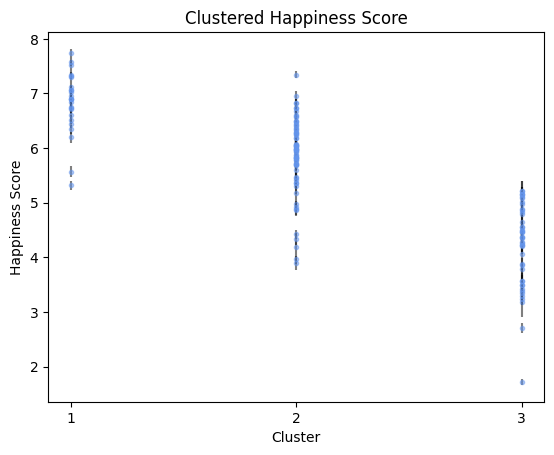

In [31]:

plt.errorbar(km.labels_+1, report["Ladder score"], yerr = (report["upperwhisker"]- report["lowerwhisker"])/2,
             fmt='.', alpha =.5, ecolor= 'k', color = "cornflowerblue")
plt.xticks(range(1,3+1))
plt.ylabel("Happiness Score")
plt.xlabel("Cluster")
plt.title("Clustered Happiness Score")

**Fig 4**: This plot shows the clusters assigned by KMeans on the standardized World Happiness Dataset, using Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual features to create 3 clusters. We can see that the clusters 1, 2, and 3 center around three different regions of the Happiness Score, which makes sense given that the Happiness Score is supposed to represent how all these features affect the happiness of a population and kmeans seeks to sort the countries given this information. It stands to reason that the two groupings would come to similar divisions, even if one is discrete and the other continuous.

In [35]:
def plot_intravariance_vs_clusters(df, max_clusters, ax):
  icvs = []
  for i in range(2, max_clusters+1):
    km = cluster.KMeans(n_clusters = i, random_state=777).fit(df)
    icvs.append(km.inertia_)
  ax.plot(range(2,max_clusters+1), icvs, marker = "o")
  ax.set_xlabel("Number of clusters")
  ax.set_ylabel("Intracluster variance")

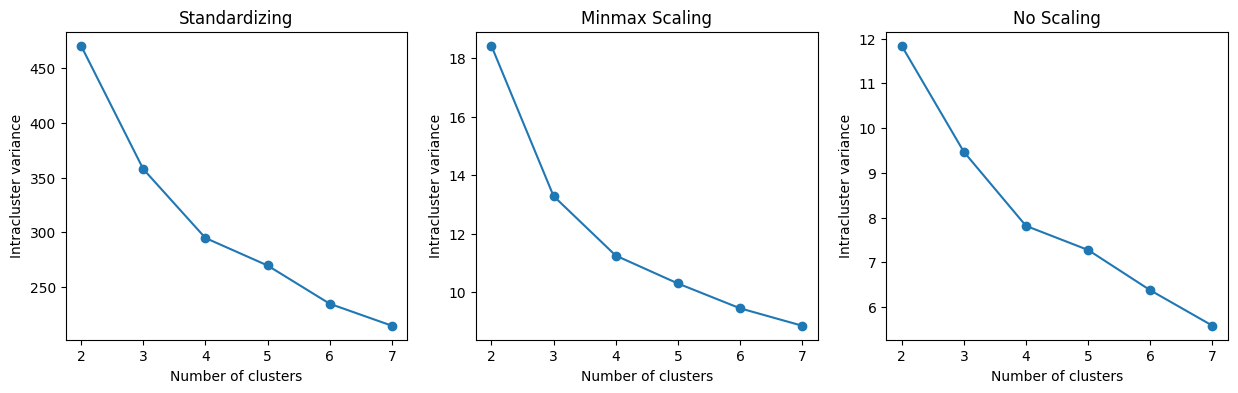

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,4))
plot_intravariance_vs_clusters(report_standard[km_features],7,ax1)
plot_intravariance_vs_clusters(report_minmax[km_features],7,ax2)
plot_intravariance_vs_clusters(report[km_features],7,ax3)
ax1.set_title("Standardizing")
ax2.set_title("Minmax Scaling")
ax3.set_title("No Scaling")
plt.show()

**Fig 5:** Here the in inter plot variance is plotted vs. the number of groups created using KMeans on the World Happiness Dataset standardized (left), Minmax scaling (center), and no scaling (right) using the same features as above. The ideal number of clusters is supposed to be indicated by the inflection point(s). In this plot there is no definative inflection points where after the intercluster variance plateaus, so you can not desively claim this is the best number of clusters to create, but nonetheless is a good starting point for analysis. The most prominate inflection point in the standarized and the Minmax plot is at 4 cluster. The inflection is more prominate on the standardization while the Minmax is more continuously sloped. The unscaled plot also has an inflect point at 4, but should not be used as the variables were not normalized and this causes artifical focus on larger variables.